In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import  precision_score


In [4]:
data = pd.read_csv('train_mobile.csv', sep =';')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,0


<AxesSubplot:>

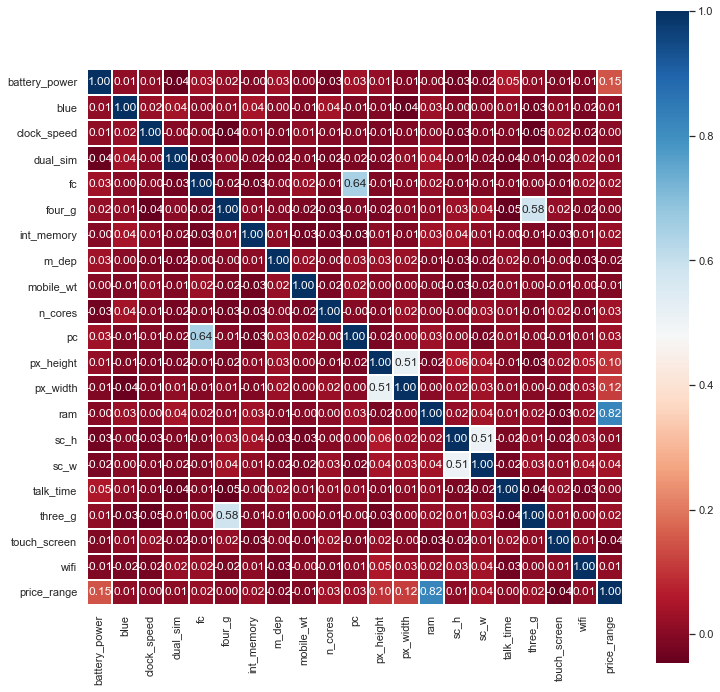

In [6]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(data.corr(), square=True,
              annot=True, fmt=".2f", linewidths=0.1, cmap="RdBu")

<AxesSubplot:>

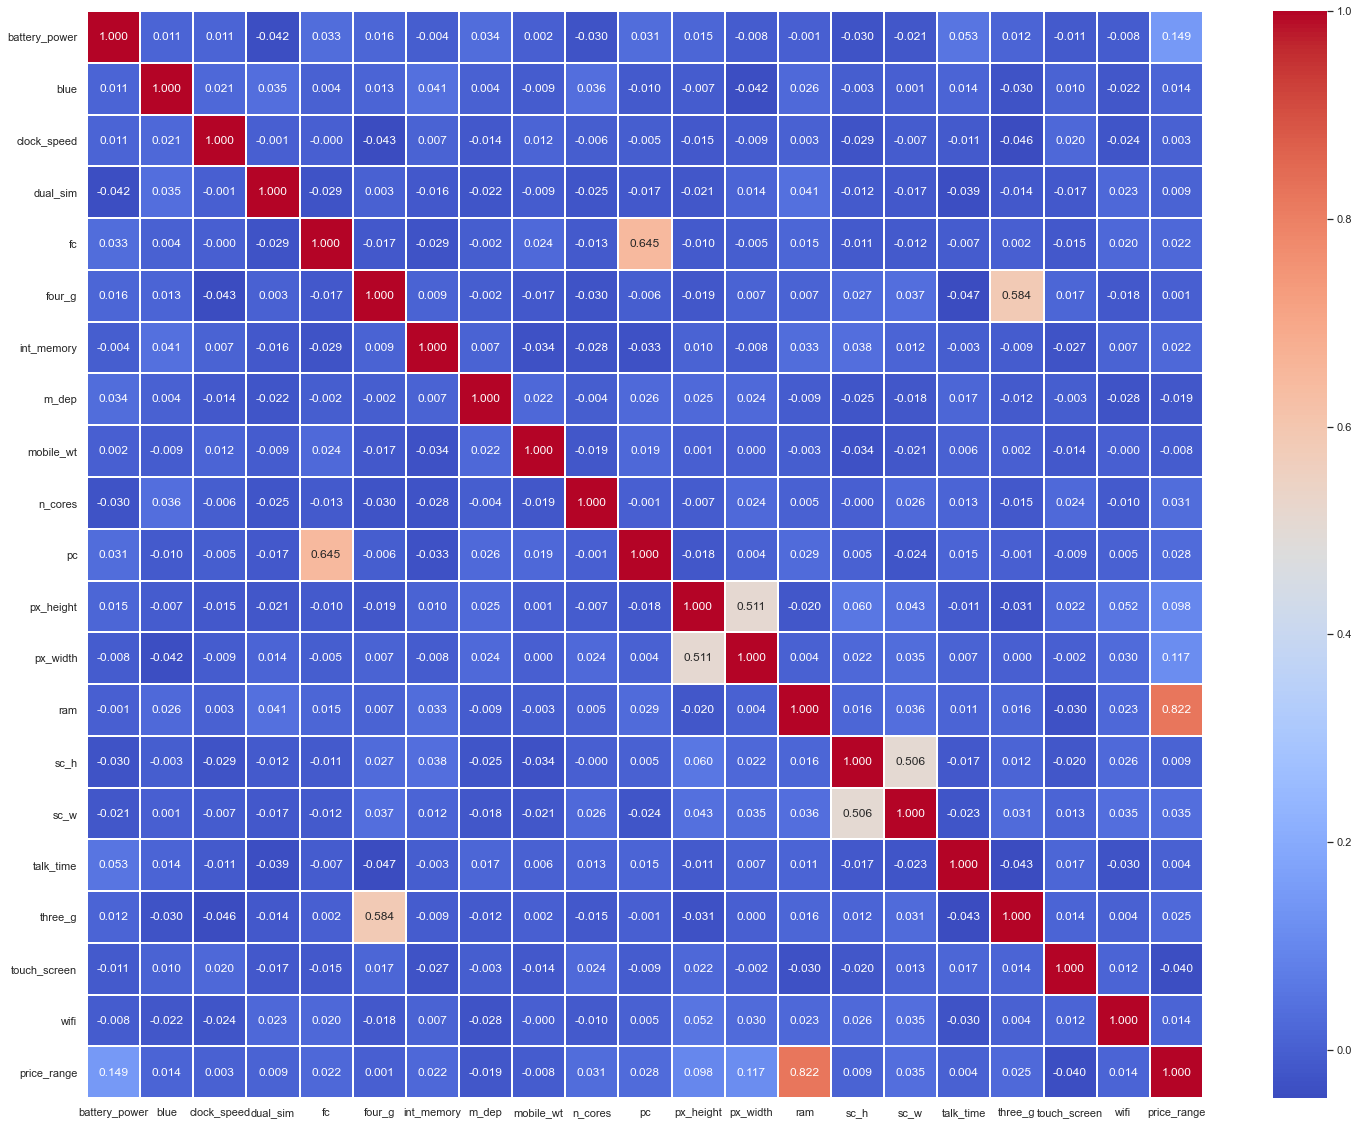

In [10]:
sns.set(font_scale=1)
plt.subplots(figsize=(25, 20))
sns.heatmap(
    data.corr(),
    annot=True,
    fmt='.3f',
    linewidths=0.1,
    cmap="coolwarm",
)

In [18]:
data.corr().price_range.sort_values()

touch_screen    -0.040001
m_dep           -0.018554
mobile_wt       -0.007968
four_g           0.001001
clock_speed      0.003494
talk_time        0.004394
dual_sim         0.009002
sc_h             0.009140
blue             0.014001
wifi             0.014001
int_memory       0.022132
fc               0.022464
three_g          0.024638
pc               0.027628
n_cores          0.031260
sc_w             0.035359
px_height        0.097951
px_width         0.116703
battery_power    0.149402
ram              0.822354
price_range      1.000000
Name: price_range, dtype: float64

Теперь необходимо обучить алгоритм.  Для начала разбейте выборку на тестовую и обучающую, размер тестовой задайте 0.2. Параметр random_state=31. В качестве модели возьмите логистическую регрессию. В качестве предикторов возьмите пять ранее отобранных признаков.

Рассчитайте метрику, которая покажет, какая доля телефонов, обозначенных классификатором как дорогие, действительно относится к этой категории. 

In [22]:
data = data[["ram", "battery_power", "px_width", "px_height", "touch_screen", "price_range"]]

In [30]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1:]
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=31)
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_predicted = model.predict(X_val)


/Users/alexigna/projects/skillfactory/data science/skillfactory_rds/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [32]:
print(round(precision_score(Y_val,Y_predicted), 4))

0.9859
